<a href="https://colab.research.google.com/github/janaat22/MLdatasets/blob/master/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
import nltk  
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df = pd.read_csv("ReviewCSV.csv")

print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
pd.DataFrame(
counts.tolist(), 
columns=["Count of values"], 
index=counts.index.values
).transpose()
)
df['label'] = df.label.map({'Y': 0, 'N': 1}) 
df['review'] = df.review.map(lambda x: x.lower()) 
df['review'] = df.review.str.replace('[^\w\s]', '')

#Preprocess Data
df['review'] = df['review'].apply(nltk.word_tokenize)

Number of rows:  61541


,month,date,year,reviewid,reviewerid,productid,rating1,rating2,rating3,rating4,review,label
Count of values,61541,61541,61541,61541,61541,61541,61541,61541,61541,61541,61541,61541


In [0]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['review'] = df['review'].apply(lambda x: [stemmer.stem(y) for y in x]) 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
df['review'] = df['review'].apply(lambda x: ' '.join(x))



In [0]:
features = df.drop(["label"], axis=1).columns

le = preprocessing.LabelEncoder()
for column_name in df.columns:
        if df[column_name].dtype == object:
            df[column_name] = le.fit_transform(df[column_name])
        else:
            pass

df_train, df_test = train_test_split(df, test_size=0.25)


In [18]:
df_train = df_train.fillna(method='ffill')

#train classifier

clf = BernoulliNB()

clf.fit(df_train[features], df_train["label"])


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
#make predictions

predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([1., 1., 1., ..., 1., 1., 1.])

In [20]:
#Evaluation

score = clf.score(df_test[features], df_test["label"])
print("Accuracy: ", score)

Accuracy:  0.8740413362797348


In [21]:
#Confusion Matrix

get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["label"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix) 

,Predicted False,Predicted True
Actual False,0,1938
Actual True,0,13448


Text(0, 0.5, 'Prediction')

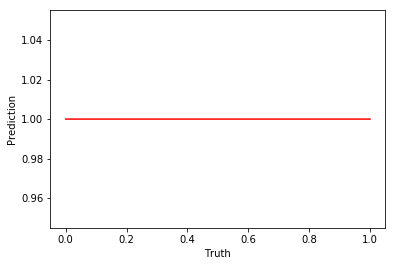

In [31]:
#
plt.plot(df_test["label"], predictions, color ='red')
plt.xlabel("Truth")
plt.ylabel("Prediction")